In [33]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [27]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


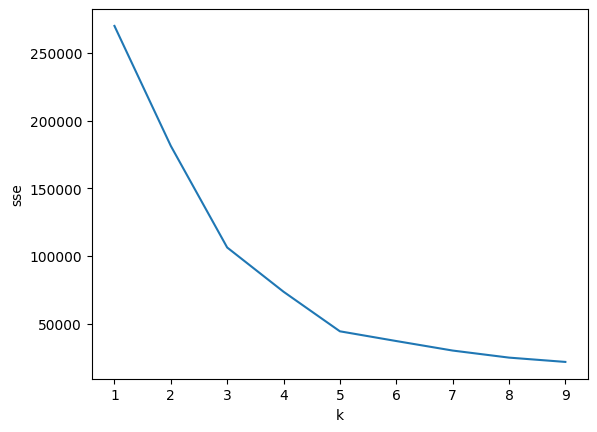

In [28]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
sse = []
k_rng= range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, 
                tol=0.0001, random_state=111, algorithm='lloyd')
    km.fit(X2)
    sse.append(km.inertia_)
    

plt.plot(k_rng,sse)
plt.xlabel('k')
plt.ylabel('sse')
plt.show()

    

In [29]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})



In [36]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X2)
x

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

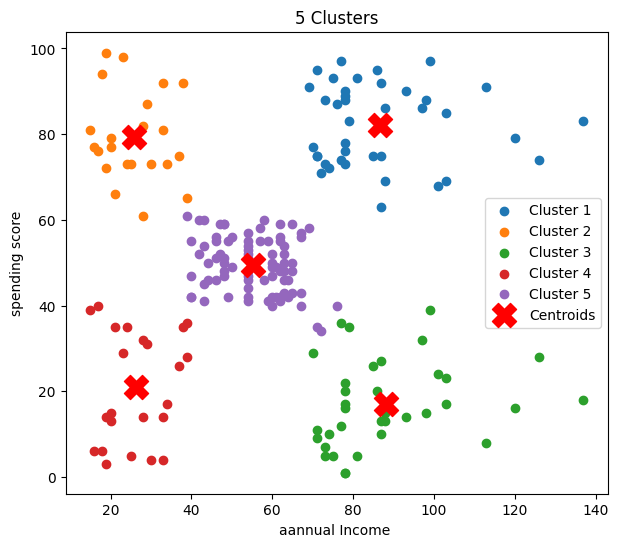

In [52]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300,tol=0.0001, random_state=111, algorithm='lloyd')
y_pred = km.fit_predict(X)

df['Clusters'] = y_pred

plt.figure(figsize=(7,6))
for cluster in range(5):
    cluster_data = df[df['Clusters'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster + 1}')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1] s=300, c='red', marker='X', label='Centroids')
plt.title('5 Clusters')
plt.xlabel('aannual Income ')
plt.ylabel('spending score')
plt.legend()
plt.show()
